# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [718]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [719]:
# посмотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Соберем общую информацию:

- total_images - 23699 - int64 - число фотографий квартиры в объявлении
- last_price - 23699 - float64 - цена на момент снятия с публикации
- total_area - 23699 - float64 - площадь квартиры в квадратных метрах (м²)
- first_day_exposition - 23699 - object - дата публикации (д.б. datetime)
- rooms - 23699 - int64 - число комнат
- ceiling_height - 14504 - float64 - высота потолков в метрах
- floors_total - 23613 - float64 - всего этажей в доме
- living_area - 21796 - float64 - жилая площадь в квадратных метрах(м²)
- floor - 23699 - int64 - этаж
- is_apartment - 2775 - object - апартаменты (булев тип)
- studio - 23699 - bool - квартира-студия (булев тип)
- open_plan - 23699 - bool - свободная планировка (булев тип)
- kitchen_area - 21421 - float64 - площадь кухни в квадратных метрах (м²)
- balcony - 12180 - float64 - число балконов (д.б. int)
- locality_name - 23650 - object - название населённого пункта
- airports_nearest - 18157 - float64 - расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest - 18180 - float64 - расстояние до центра города (м)
- parks_around3000 - 18181 - float64 - число парков в радиусе 3 км
- parks_nearest - 8079 - float64 - расстояние до ближайшего парка (м)
- ponds_around3000 - 18181 - float64 - число водоёмов в радиусе 3 км
- ponds_nearest - 9110 - float64 - расстояние до ближайшего водоёма (м)
- days_exposition - 20518 - float64 - сколько дней было размещено объявление (от публикации до снятия)

In [720]:
# Посмотрим список колонок (наличие лишних пробелов и тд)
print(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [721]:
# выставим опцию, т.к. колонок слишком много, чтобы видеть сразу все данные
# + запас, на случай, если понадобится добавлять новые колонки
pd.set_option('display.max_columns', len(df.columns) + 5)
#посмотрим набор данных
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [722]:
# посмотрим описание данных
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

- Среди названия колонок нет единообразия. 
  - Особо выделяются `cityCenters_nearest`, `ponds_around3000`, `parks_around3000`. Заменим эти названия
  - Булевы типы приведем к одному виду: `studio` -> `is_studio`, `open_plan` -> `is_open_plan`
  - Изменим названия столбцов на те, что больше отражают суть содержащихся данных
- Неверные типы данных
  - Число балконов `balcony` не м.б. float
  - Сколько дней было размещено объявление (от публикации до снятия) `days_exposition` д.б. int
  - Дата публикации `first_day_expostion` нужно перевести из строки в Datetime, возможно вообще переименовать поле
  - Всего этажей в доме `floors_total` нужно перевести в int
  - Признак апартаментов `is_apartment` нужно перевести из строки в bool
  - Число парков в радиусе 3 км `parks_around3000` перевести в int
  - Число водоёмов в радиусе 3 км `ponds_around3000` перевести в int
- Неудобный порядок столбцов (данные криво сгруппированы). Имеет смысл поменять
- Бросается в глаза сильно больше значение max для `ceiling_height` и `days_before_close`
  
Дополнительные заметки к данным (возможно, нужно будет проверить):
- Пустые значения в парах `ponds_around3000` и `ponds_nearest` связаны с отсутствием водоемов
- Пустые значения в парах `parks_around3000` и `parks_nearest` связаны с отсутствием парков
- Пустое значение в `days_exposition` может означать, что объявление еще на публикации
- Пустое значение в `balcony` скорее всего означает отсуствие балкона
- Пустое значение в `is_apartment` скорее всего означает, что объект недвижимости - не апаратаменты

### Шаг 2. Предобработка данных

#### Колонки и таблица в целом

In [723]:
# переименуем ряд заголовков для более удобной работы с ними

# first_day_exposition -> created_datetime
# rooms -> rooms_count
# floors_total -> total_floors
# studio -> is_studio
# open_plan -> is_open_plan
# balcony -> balcony_count
# airports_nearest -> nearest_airport_distance
# cityCenters_nearest -> nearest_city_center_distance
# parks_around3000 -> parks_in_3km_count
# parks_nearest -> nearest_park_distance
# ponds_around3000 -> ponds_in_3km_count
# ponds_nearest -> nearest_pond_distance
# days_exposition -> days_before_close

(df.set_axis(
    ['total_images', 'last_price', 'total_area', 'created_datetime',
     'rooms_count', 'ceiling_height', 'total_floors', 'living_area', 'floor',
     'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony_count',
     'locality_name', 'nearest_airport_distance', 'nearest_city_center_distance',
     'parks_in_3km_count', 'nearest_park_distance', 'ponds_in_3km_count',
     'nearest_pond_distance', 'days_before_close'], axis = 'columns', inplace = True)
)

# поменяем порядок столбцов, чтобы данные по площадям и количеству были рядом,
# как и данные с датами, а булевы признаки уберем в конец

new_columns_order = (['balcony_count', 'rooms_count', # количество комнат
     'living_area', 'kitchen_area', 'total_area', 'ceiling_height', # площади и высота потолком
     'floor', 'total_floors', # этажи
    'locality_name', 'nearest_city_center_distance', 'nearest_airport_distance', # населенный пункт и расстояние
     'parks_in_3km_count', 'nearest_park_distance', 'ponds_in_3km_count', 'nearest_pond_distance', # парки и водоемы
     'total_images', 'last_price', # дополнительная информация
     'created_datetime', 'days_before_close', # даты и время жизни объявления
     'is_apartment', 'is_studio', 'is_open_plan'])

df = df[new_columns_order]

# проверим, что все ок
df.head()

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,created_datetime,days_before_close,is_apartment,is_studio,is_open_plan
0,NaN,3,51.0,25.0,108.0,2.70,8,16.0,Санкт-Петербург,16028.0,18863.0,1.0,482.0,2.0,755.0,20,13000000.0,2019-03-07T00:00:00,NaN,NaN,False,False
1,2.0,1,18.6,11.0,40.4,NaN,1,11.0,посёлок Шушары,18603.0,12817.0,0.0,NaN,0.0,NaN,7,3350000.0,2018-12-04T00:00:00,81.0,NaN,False,False
2,0.0,2,34.3,8.3,56.0,NaN,4,5.0,Санкт-Петербург,13933.0,21741.0,1.0,90.0,2.0,574.0,10,5196000.0,2015-08-20T00:00:00,558.0,NaN,False,False
3,0.0,3,NaN,NaN,159.0,NaN,9,14.0,Санкт-Петербург,6800.0,28098.0,2.0,84.0,3.0,234.0,0,64900000.0,2015-07-24T00:00:00,424.0,NaN,False,False
4,NaN,2,32.0,41.0,100.0,3.03,13,14.0,Санкт-Петербург,8098.0,31856.0,2.0,112.0,1.0,48.0,2,10000000.0,2018-06-19T00:00:00,121.0,NaN,False,False


#### Заполнение пропусков

Поскольку мы не можем изменить типы, пока не удалим или не обработаем пропуски, сначала займемся этим.

Мы бы хотели изменить типы для:
- Числа балконов не м.б. float
- Сколько дней было размещено объявление (от публикации до снятия) 
- Дата публикации first_day_expostion нужно перевести из строки в Datetime
- Всего этажей в доме нужно перевести в int
- Признак апартаментов нужно перевести из строки в bool
- Число парков в радиусе 3 км перевести в int
- Число водоёмов в радиусе 3 км перевести в int

In [724]:
# для начала поищем пустые значения
df.isnull().sum()

balcony_count                   11519
rooms_count                         0
living_area                      1903
kitchen_area                     2278
total_area                          0
ceiling_height                   9195
floor                               0
total_floors                       86
locality_name                      49
nearest_city_center_distance     5519
nearest_airport_distance         5542
parks_in_3km_count               5518
nearest_park_distance           15620
ponds_in_3km_count               5518
nearest_pond_distance           14589
total_images                        0
last_price                          0
created_datetime                    0
days_before_close                3181
is_apartment                    20924
is_studio                           0
is_open_plan                        0
dtype: int64

*Небольшая ремарка*

- `nearest_city_center_distance` мы не будем трогать. Считать медианой будет неверно, т.к. расстояние до центра сильно зависит от размера населенного пункта, но по имеющимся данным восстановить эти данные нельзя. Павел Говоров подтвердил. Поэтому эти пропуски трогать пока не будем
- Это также касается `nearest_airport_distance` по той же логике. Ситуаций, когда нет одного, но есть другое очень мало.
- Также не будем трогать `days_before_close` предполагая, что если нет данных, объявление не закрыто. Для дальнейшего анализа эти данные нам не понадобятся

In [725]:
# будем считать, что если балконы не указаны, то это означает 0, т.к. в противном случае это было бы преимуществом
df['balcony_count'] = df['balcony_count'].fillna(0)

# слишком обльшое количество пропущенных значений в is_apartment буду считать за True,
# т.к. выгрузка согласно заданию - это выгрузка квартир в разных населенных пунктах
df['is_apartment'] = df['is_apartment'].fillna(True)

# Т.к. записей с пустым locality_name немного, а сгенерировать мы их никак не можем (кроме замены модой)
# считаю правильным вариантом удалить их (иначе в Санкт-Петербург может попасть то, что не должно было)
df.dropna(subset=['locality_name'], inplace=True)

# аналогичным образом поступим и с незаполненным количеством этажей
# т.к. их немного и восстановление данных даже модой нам мало чем поможет
df.dropna(subset=['total_floors'], inplace=True)

# высоту потолков заполним медианой (особенно учитывая максимальное значение, что мы еще не исправляли)
ceiling_height_median = df['ceiling_height'].median();
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median)

# Попробуем разобраться с парками и водоемами. Чаще всего не указано расстояние для случая, когда парка в 3х километрах нет
# А значит расстояние до ближайшего парка превышает это значение. Заполним в таком случае расстояние 5000 метров
# При этом ситуации, когда не указано количество парков или водоемов, но есть расстояние - нет.
# А значит пропущенные значения парков и водоемов можно заменить на 0

df['parks_in_3km_count'] = df['parks_in_3km_count'].fillna(0)
df['nearest_park_distance'] = df['nearest_park_distance'].fillna(5000)

df['ponds_in_3km_count'] = df['ponds_in_3km_count'].fillna(0)
df['nearest_pond_distance'] = df['nearest_pond_distance'].fillna(5000)

# проверим на парках, что все ок
df[(df['parks_in_3km_count'] != 0) & (df['nearest_park_distance'] == 5000)]

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,total_images,last_price,created_datetime,days_before_close,is_apartment,is_studio,is_open_plan


*Небольшая ремарка*

Для площадей `kitchen_area`, `living_area` сначала мы попробуем вычислить пустые значения
- если есть kitchen_area, но нет living_area; living_area = total_area - kitchen_area
- если есть living_area, но нет kitchen_area; kitchen_area = total_area - living_area
- для случая, когда нет и kitchen_area, и living_area будем брать медиану значений по total_area

Почему бы нам сразу не использовать медиану? Чем больше значений мы вычислим сразу по имеющимся данным, тем точнее она будет.

In [726]:
# сделаем рассчеты для площадей 'kitchen_area', 'living_area'

# для проверки на NaN
import math

# рассчитаем медианы возможных жилых площадей по общей площади квартиры
# для случая, когда нет ни площади кухни, ни жилой
# будем использовать в функции в дальнейшем

def calculate_area_median_dict(area_type):
    total_areas_for_empty_data = df[df[area_type].isnull()]['total_area'].unique()
    area_with_data = df[df[area_type].notnull()]
    
    result = dict()
    
    for total_area_temp in total_areas_for_empty_data:
        # т.к. в выборке может не быть нашей площади или с нашей площадью будет мало квартир,
        # берем +- 10%
        total_area_min = total_area_temp - (total_area_temp * 0.1)
        total_area_max = total_area_temp + (total_area_temp * 0.1)
    
        temp_area_median = (area_with_data
                            .query('total_area >= @total_area_min and total_area <= @total_area_max')
                            [area_type].median())
    
        result[total_area_temp] = temp_area_median
        
    return result
    
living_area_median_dict = calculate_area_median_dict('living_area')
    
# вычислим жилую площадь
def calculate_living_area(row):
    if math.isnan(row['living_area']):
        return living_area_median_dict[row['total_area']]
    
    return row['living_area']

df['living_area'] = df.apply(calculate_living_area, axis=1)

# вычислим площадь кухни, при этом у нас должны все living_area быть заполнены
kitchen_area_median_dict = calculate_area_median_dict('kitchen_area')

def calculate_kitchen_area(row):
    if math.isnan(row['kitchen_area']):
        return kitchen_area_median_dict[row['total_area']]
    
    return row['kitchen_area']

df['kitchen_area'] = df.apply(calculate_kitchen_area, axis=1)

# проверим, что на данном этапе все ок
df.isnull().sum()

balcony_count                      0
rooms_count                        0
living_area                        0
kitchen_area                       1
total_area                         0
ceiling_height                     0
floor                              0
total_floors                       0
locality_name                      0
nearest_city_center_distance    5501
nearest_airport_distance        5524
parks_in_3km_count                 0
nearest_park_distance              0
ponds_in_3km_count                 0
nearest_pond_distance              0
total_images                       0
last_price                         0
created_datetime                   0
days_before_close               3171
is_apartment                       0
is_studio                          0
is_open_plan                       0
dtype: int64

In [727]:
# Можно заметить, что осталась 1 запись, у которой kitchen_area не было заполнено
# Это случай, когда мы не смогли вычислить медиану из-за недостатка данных
# Т.к. осталась всего 1 запись, удалим её
df.dropna(subset=['kitchen_area'], inplace=True)

#### Работа над типами данных

In [728]:
# Изменим типы данных

# Цена квартиры с точностью до копейки не используется
df['last_price'] = df['last_price'].astype('int')

# Число балконов balcony не м.б. float
df['balcony_count'] = df['balcony_count'].astype('int')

# Количество этажей не м.б. float
df['total_floors'] = df['total_floors'].astype('int')

# Количество парков и водоемов - также должно быть целым числом
df['parks_in_3km_count'] = df['parks_in_3km_count'].astype('int')
df['ponds_in_3km_count'] = df['ponds_in_3km_count'].astype('int')

# Приведем даты к datetime
df['created_datetime'] = pd.to_datetime(df['created_datetime'], format='%Y-%m-%dT%H:%M:%S')

# привести к целому значение days_before_close мы не можем, т.к. решили не заполнять его значения
# остальные значения должны иметь верный тип, проверим это
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   balcony_count                 23564 non-null  int64         
 1   rooms_count                   23564 non-null  int64         
 2   living_area                   23564 non-null  float64       
 3   kitchen_area                  23564 non-null  float64       
 4   total_area                    23564 non-null  float64       
 5   ceiling_height                23564 non-null  float64       
 6   floor                         23564 non-null  int64         
 7   total_floors                  23564 non-null  int64         
 8   locality_name                 23564 non-null  object        
 9   nearest_city_center_distance  18063 non-null  float64       
 10  nearest_airport_distance      18040 non-null  float64       
 11  parks_in_3km_count          

#### Обработка дубликатов

In [729]:
# проверим, есть ли дубликаты в таблице с помощью метода duplicated
df.duplicated().sum()

0

### Вывод по шагу 2

Мы привели таблицу к единообразию, привели к целым числам поля, которые по своей сути не могли содержать вещественное значением. Часть данных по имеющимся записям восстановить затруднительно (`nearest_city_center_distance`, `nearest_airport_distance`), поэтому мы оставили их как есть. Хотя в нашем случае важно сообщить об этой находке тому, кто выгружал данные, т.к. таких записей довольно много.

Пустые записи в `days_before_close` мы считаем записями о до сих пор активных объявлениях.

Записи о времени мы привели к соотвествующему типу, чтобы иметь возможность проводить дополнительные манипуляции.

В целом, теперь данные пригодны для анализа.

### Шаг 3. Посчитайте и добавьте в таблицу

In [730]:
# Добавим в таблицу поля, которые понадобятся нам в дальнейшем

# Добавим цену квадратного метра;
df['square_meter_price'] = round(df['last_price'] / df['total_area'], 2)

# Добавим день недели, месяц и год публикации объявления;
df['created_year'] = df['created_datetime'].dt.year
df['created_month'] = df['created_datetime'].dt.month
df['created_month'] = df['created_datetime'].dt.day
df['created_weekday'] = df['created_datetime'].dt.weekday

# Добавим этаж квартиры; варианты — первый, последний, другой;
def get_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_floors']:
        return 'последний'
    return 'другой'

df['floor_type'] =  df.apply(get_floor_type, axis=1)

# Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей.
df['living_area_part'] = round(df['living_area'] / df['total_area'], 2)
df['kitchen_area_part'] = round(df['kitchen_area'] / df['total_area'], 2)

# проверим новые поля
df.head(10)

,balcony_count,rooms_count,living_area,kitchen_area,total_area,ceiling_height,floor,total_floors,locality_name,nearest_city_center_distance,nearest_airport_distance,parks_in_3km_count,nearest_park_distance,...,last_price,created_datetime,days_before_close,is_apartment,is_studio,is_open_plan,square_meter_price,created_year,created_month,created_weekday,floor_type,living_area_part,kitchen_area_part
0,0,3,51.000,25.00,108.00,2.70,8,16,Санкт-Петербург,16028.0,18863.0,1,482.0,...,13000000,2019-03-07,NaN,True,False,False,120370.37,2019,7,3,другой,0.47,0.23
1,2,1,18.600,11.00,40.40,2.65,1,11,посёлок Шушары,18603.0,12817.0,0,5000.0,...,3350000,2018-12-04,81.0,True,False,False,82920.79,2018,4,1,первый,0.46,0.27
2,0,2,34.300,8.30,56.00,2.65,4,5,Санкт-Петербург,13933.0,21741.0,1,90.0,...,5196000,2015-08-20,558.0,True,False,False,92785.71,2015,20,3,другой,0.61,0.15
3,0,3,94.845,18.75,159.00,2.65,9,14,Санкт-Петербург,6800.0,28098.0,2,84.0,...,64900000,2015-07-24,424.0,True,False,False,408176.10,2015,24,4,другой,0.60,0.12
4,0,2,32.000,41.00,100.00,3.03,13,14,Санкт-Петербург,8098.0,31856.0,2,112.0,...,10000000,2018-06-19,121.0,True,False,False,100000.00,2018,19,1,другой,0.32,0.41
5,0,1,14.400,9.10,30.40,2.65,5,12,городской посёлок Янино-1,NaN,NaN,0,5000.0,...,2890000,2018-09-10,55.0,True,False,False,95065.79,2018,10,0,другой,0.47,0.30
6,1,1,10.600,14.40,37.30,2.65,6,26,посёлок Парголово,19143.0,52996.0,0,5000.0,...,3700000,2017-11-02,155.0,True,False,False,99195.71,2017,2,3,другой,0.28,0.39
7,2,2,42.700,18.90,71.60,2.65,22,24,Санкт-Петербург,11634.0,23982.0,0,5000.0,...,7915000,2019-04-18,NaN,True,False,False,110544.69,2019,18,3,другой,0.60,0.26
8,0,1,15.430,8.81,33.16,2.65,26,27,посёлок Мурино,NaN,NaN,0,5000.0,...,2900000,2018-05-23,189.0,True,False,False,87454.76,2018,23,2,другой,0.47,0.27
9,2,3,43.600,6.50,61.00,2.50,7,9,Санкт-Петербург,15008.0,50898.0,0,5000.0,...,5400000,2017-02-26,289.0,True,False,False,88524.59,2017,26,6,другой,0.71,0.11


### Вывод

Новые поля, что понадобятся нам в дальнейшем анализе, мы сразу добавили в таблицу

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Этап 4А. Изучим параметры площади, цены, числа комнат и высоты потолков

#### Площадь

In [731]:
df[['kitchen_area', 'living_area', 'total_area']].describe()

,kitchen_area,living_area,total_area
count,23564.000000,23564.000000,23564.000000
mean,10.426895,34.607257,60.324875
std,5.739074,22.441099,35.656427
min,1.300000,2.000000,13.000000
25%,7.000000,18.700000,40.000000
50%,9.000000,30.000000,52.000000
75%,11.780000,42.300000,69.700000
max,112.000000,409.700000,900.000000


В данных видно какую-то вакханалию с максимальными значениями и очень большое стандартное отклонение. Скорее всего есть выбросы.
Поищем их.

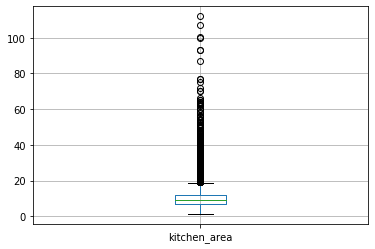

In [732]:
# Построим ящики с усами
import matplotlib.pyplot as plt
df.boxplot(column='kitchen_area')
plt.show()

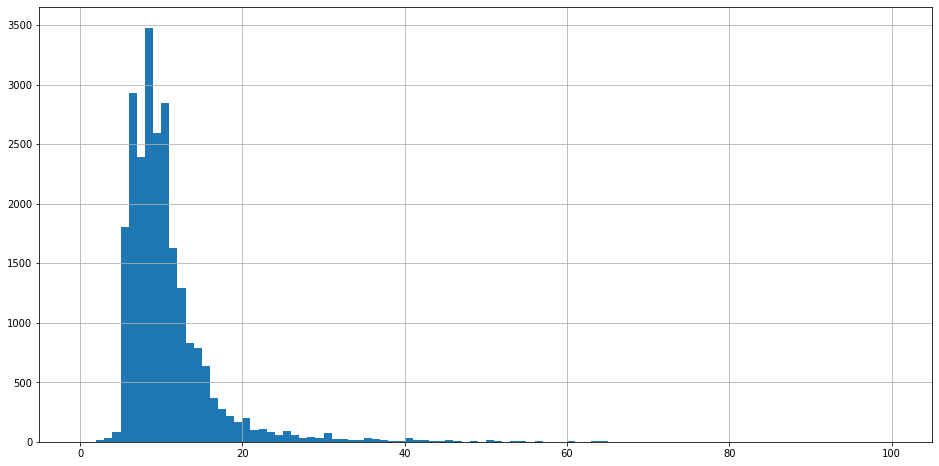

In [733]:
# Построим гистограмму Количество корзин берем побольше, чтобы увидеть закономерности в данных чуть более детально
# Размер во всех случаях берем побольше
df['kitchen_area'].hist(bins=100, range = (0, 100), figsize=(16,8))

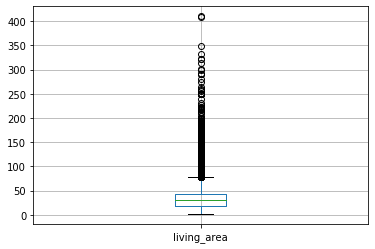

In [734]:
# продолжим с жилой площадью
df.boxplot(column='living_area')
plt.show()

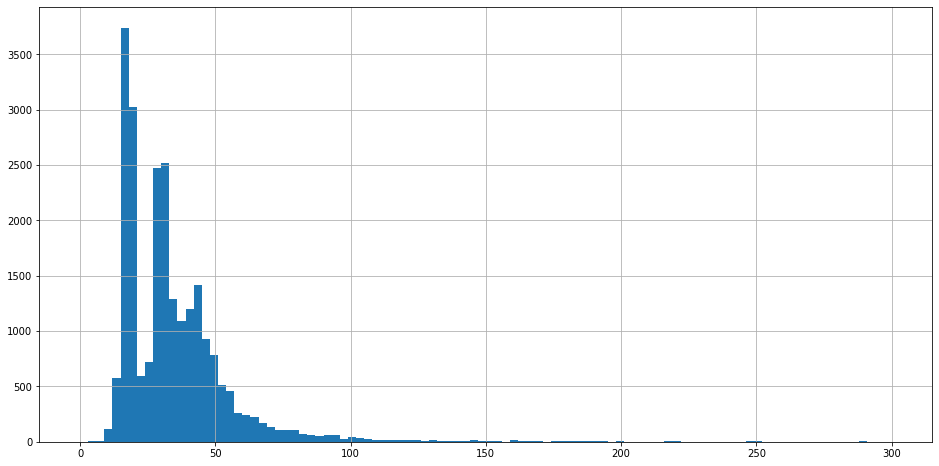

In [735]:
df['living_area'].hist(bins=100, range = (0, 300), figsize=(16,8))

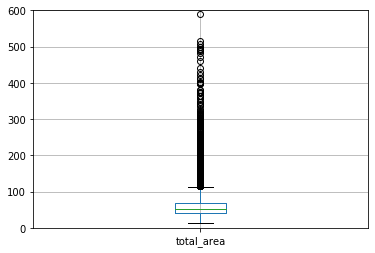

In [736]:
# Закончим общей
df.boxplot(column='total_area')
plt.ylim(0, 600)
plt.show()

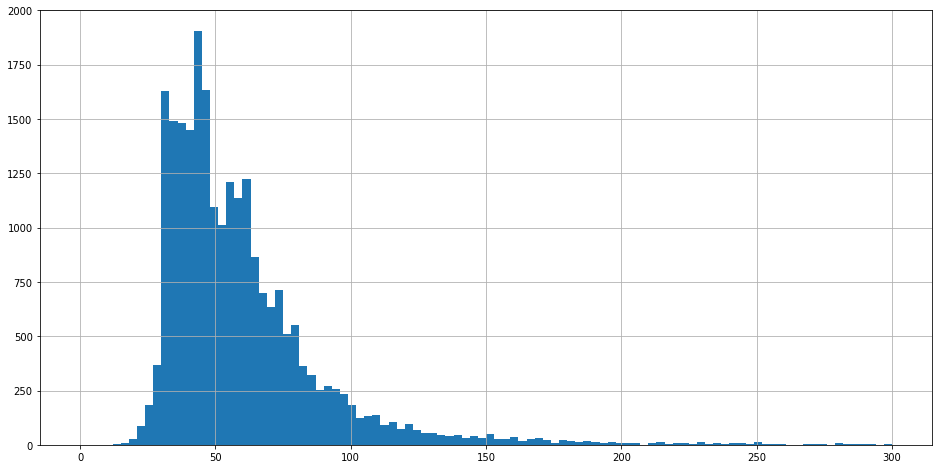

In [737]:
df['total_area'].hist(bins=100, range = (0, 300), figsize=(16,8))

#### Уберем выбросы по площадям

In [738]:
# Не будем делать отдельный срез, изменим сразу наш набор данных
df = df[df['total_area'] < 150]
df = df[df['kitchen_area'] < 20]
df = df[df['living_area'] < 75]

# посмотрим насколько изменилась выборка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21771 entries, 1 to 23698
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   balcony_count                 21771 non-null  int64         
 1   rooms_count                   21771 non-null  int64         
 2   living_area                   21771 non-null  float64       
 3   kitchen_area                  21771 non-null  float64       
 4   total_area                    21771 non-null  float64       
 5   ceiling_height                21771 non-null  float64       
 6   floor                         21771 non-null  int64         
 7   total_floors                  21771 non-null  int64         
 8   locality_name                 21771 non-null  object        
 9   nearest_city_center_distance  16401 non-null  float64       
 10  nearest_airport_distance      16383 non-null  float64       
 11  parks_in_3km_count          

**Выборка уменьшилась некритично, а от выбросом мы избавились.
Можно идти дальше**

##### Цена

In [739]:
# Посмотрим основные параметры
df[['last_price', 'square_meter_price']].describe()

,last_price,square_meter_price
count,2.177100e+04,21771.000000
mean,5.190505e+06,95029.056115
std,3.278854e+06,36671.882927
min,4.300000e+05,7962.960000
25%,3.330000e+06,75373.470000
50%,4.450000e+06,93600.000000
75%,6.150000e+06,111585.105000
max,6.500000e+07,848484.850000


Здесь стандартное отклонение не такое большое, но максимум также вызывает вопросы. 
Посмотрим ящики для двух параметров.

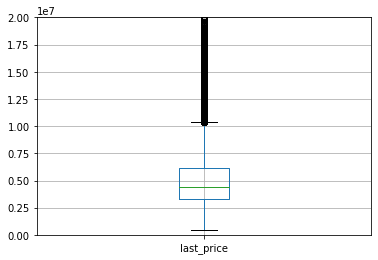

In [740]:
# Посмотрим на общую цену
df.boxplot(column='last_price')
plt.ylim(0, 2 * (10 ** 7))
plt.show()

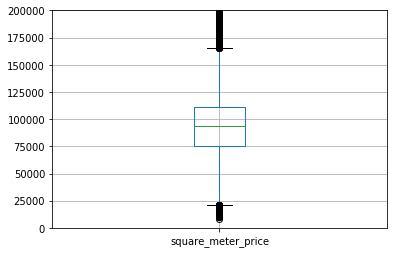

In [741]:
# И цену за квадратный метр
df.boxplot(column='square_meter_price')
plt.ylim(0, 200000)
plt.show()

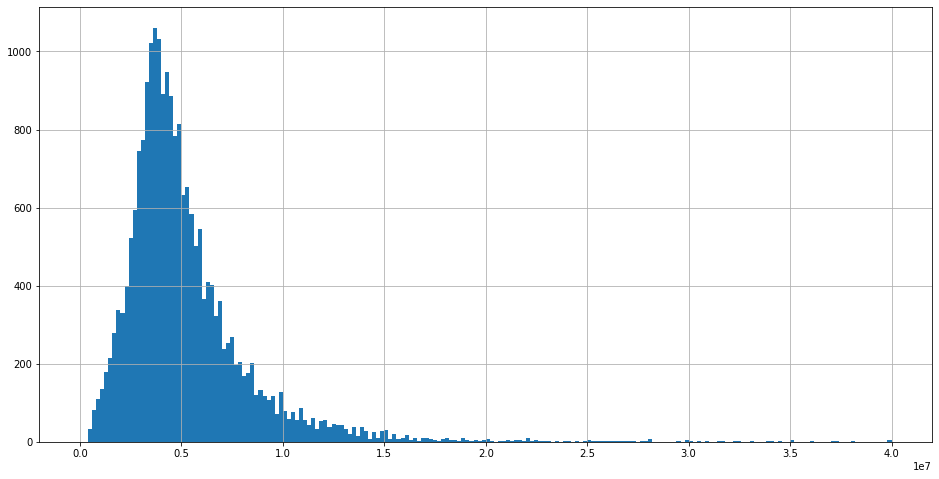

In [742]:
# Построим гистограмму по общей цене
df['last_price'].hist(bins=200, range=(0, 0.4 * (10 ** 8)), figsize=(16,8))

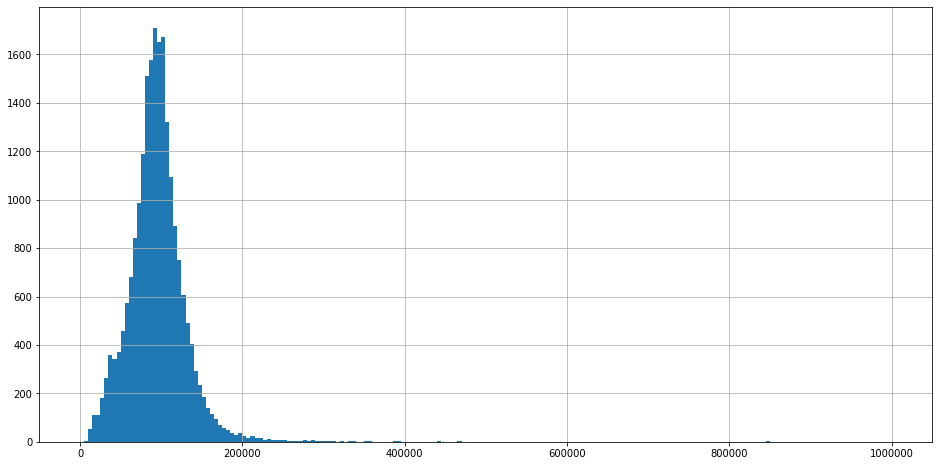

In [743]:
# Построим гистограмму цене за квадратный метр
df['square_meter_price'].hist(bins=200, range=(0, 1000000), figsize=(16,8))

#### Продолжим очищать нашу выборку от выбросов

In [744]:
# Очистим выборку от выбросов
df = df[df['last_price'] < 1.1 * (10 ** 7)]
df = df[(df['square_meter_price'] > 24000) & (df['square_meter_price'] < 160000)]

# Посмотрим, что получилось
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20201 entries, 1 to 23698
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   balcony_count                 20201 non-null  int64         
 1   rooms_count                   20201 non-null  int64         
 2   living_area                   20201 non-null  float64       
 3   kitchen_area                  20201 non-null  float64       
 4   total_area                    20201 non-null  float64       
 5   ceiling_height                20201 non-null  float64       
 6   floor                         20201 non-null  int64         
 7   total_floors                  20201 non-null  int64         
 8   locality_name                 20201 non-null  object        
 9   nearest_city_center_distance  15093 non-null  float64       
 10  nearest_airport_distance      15084 non-null  float64       
 11  parks_in_3km_count          

##### Количество комнат

In [745]:
# Посмотрим общую информацию по количеству этажей
df['rooms_count'].describe()

count    20201.000000
mean         1.905401
std          0.887822
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms_count, dtype: float64

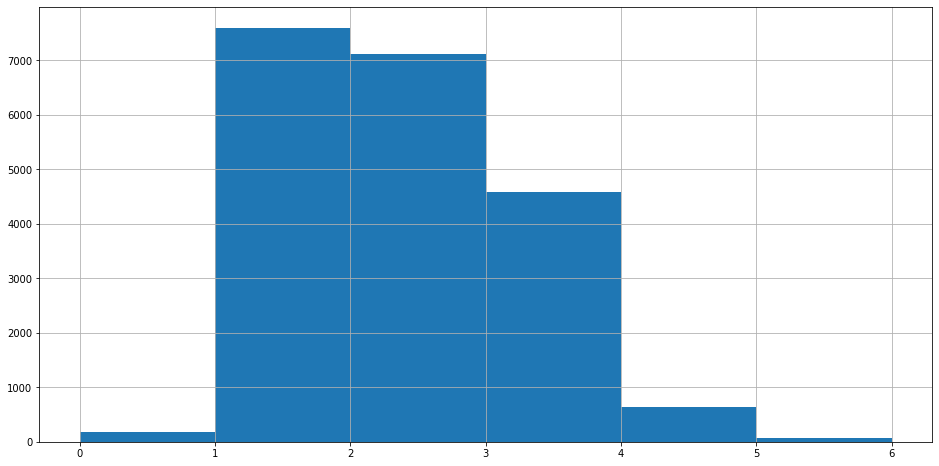

In [746]:
# Построим гистограмму по количеству этажей
df['rooms_count'].hist(bins=6, figsize=(16,8))

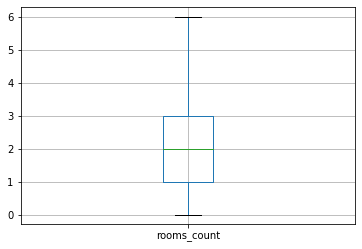

In [747]:
# Хотя визуально никаких выбросов нет, посмотрим на "ящик с усами"
df.boxplot(column='rooms_count')
plt.show()

Тут нам повезло и выбросов нет

##### Высота потолков

In [748]:
# Посмотрим общую информацию по высоте потолков
df['ceiling_height'].describe()

count    20201.000000
mean         2.691467
std          0.788813
min          1.000000
25%          2.600000
50%          2.650000
75%          2.650000
max         32.000000
Name: ceiling_height, dtype: float64

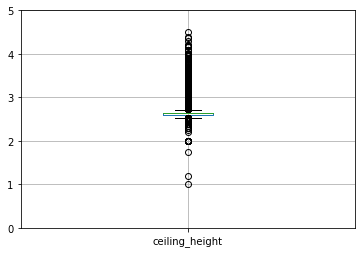

In [749]:
# Очевидно, что тут нам опять не очень повезло, посмтроим boxplot и гистограмму
df.boxplot(column='ceiling_height')
plt.ylim(0,5)
plt.show()

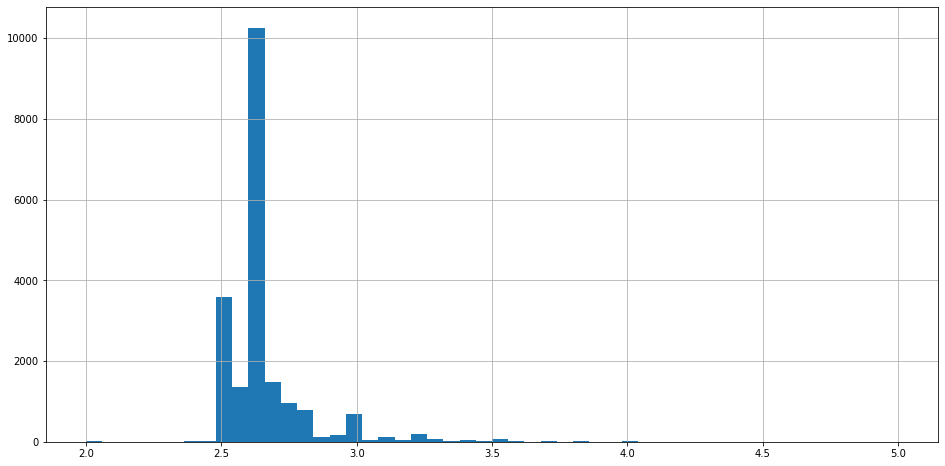

In [750]:
df['ceiling_height'].hist(bins=50, range=(2, 5), figsize=(16,8))

#### Избавимся от выбросов

In [751]:
df = df[df['ceiling_height'] > 2.5]
df = df[df['ceiling_height'] <= 3]

df.reset_index(inplace=True)

# посмотрим, что в итоге осталось:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15977 entries, 0 to 15976
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   index                         15977 non-null  int64         
 1   balcony_count                 15977 non-null  int64         
 2   rooms_count                   15977 non-null  int64         
 3   living_area                   15977 non-null  float64       
 4   kitchen_area                  15977 non-null  float64       
 5   total_area                    15977 non-null  float64       
 6   ceiling_height                15977 non-null  float64       
 7   floor                         15977 non-null  int64         
 8   total_floors                  15977 non-null  int64         
 9   locality_name                 15977 non-null  object        
 10  nearest_city_center_distance  11870 non-null  float64       
 11  nearest_airport_distance    

### Вывод по этапу 4А (исследование и поиск выбросов)

- Благодаря исследованию данных мы избавились от выбросов, что могли повлиять на наше исследование и выводы по нему.
- Наша выборка при этом сократилась с 23699 до 15977, т.е. примерно на 30 процентов. Что довольно прилично и хочется верить, что мы не отрезали ничего лишнего.
- Почти все параметры имеют вид нормального распределения, но у `living_area` заметен определенный всплеск на 20 кв.м. Хотя в данном случае я исхожу из того, что это возможно. Если я ошибаюсь, дальнейший анализ это покажет.
- Никаких выбросов не обнаружено в количестве комнат
- Разброс по цене и выбросы по ней могут показывать, что цена квартиры выше или ниже определенного значения неактуальна. Однако, мы не проводили анализ по регионам, поэтому разброс возможен.
- Неадекватное среднее отклонение было у площадей, мы не можем это чем-то объяснить. Пожалуй, нужно просить человека, что выгружал данные, их перепроверить.

### Этап 4Б. Изучим время продажи квартиры

In [752]:
# Поскольку мы приняли, что NaN значения в days_before_close означают, что объявление еще актуально,
# то исключим их из данного анализа (т.к. количество дней этого объявления будет сильно зависеть от времени
# проведения нами анализа, что будет давать разный результат в разный период времени)

df_already_closed = df[df['days_before_close'].notnull()]

# изучим время продажи квартиры, чтобы ответить на вопросы
df_already_closed['days_before_close'].describe()

count    14345.000000
mean       169.641269
std        207.118424
min          2.000000
25%         43.000000
50%         90.000000
75%        215.000000
max       1553.000000
Name: days_before_close, dtype: float64

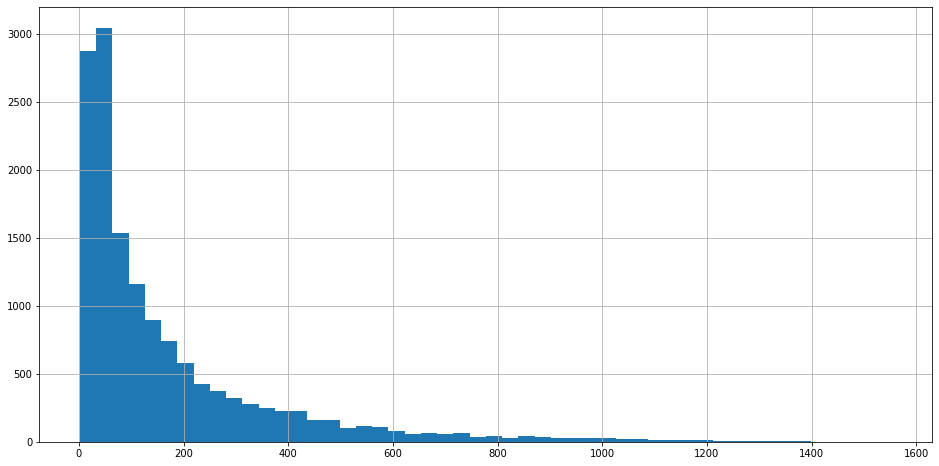

In [753]:
# Построим гистограмму
df_already_closed['days_before_close'].hist(bins=50, figsize=(16,8))

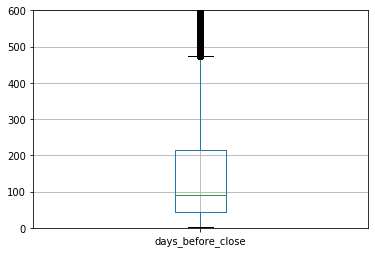

In [754]:
# ... и уже ставший моим любимым, без сарказма, boxplot
df_already_closed.boxplot(column='days_before_close')
plt.ylim(0,600)
plt.show()

### Вывод по этапу 4Б (исследование времени продажи квартиры)

- Время продажи описывается Пуассоновским распределением, что для него и было ожидаемо.
- В рамках нашей выборки среднее больше медианы, а значит многие квартиры из выборки продавались весьма долго (что можно увидеть и на "ящике с усами"). На это же указывает и большое стандартное отклонение.
- Можно считать, что продажи прошли очень быстро, если заняли меньше 40 дней, а необычно долго если больше 215 дней (хотя тут спорно, и если применять слово необычно, можно сказать о 450 днях), т.к. остальное укладывается в норму для нашей выборки

### Этап 4В. Какие факторы больше всего влияют на цену квартиры?

Проверим зависимость цены от:
- квадратного метра (уточнение от преподавателя - общей площади)
- числа комнат
- этажа (первого или последнего)
- удалённости от центра
- от даты размещения: дня недели, месяца и года. 

#### Зависимость цены от параметров

In [755]:
# Посмотрим коэффиценты корреляции Пирсона для каждого параметра
# Начнем с цены за квардратный метр
df['last_price'].corr(df['total_area'])

0.7134215091466997

In [756]:
# Зависимость от числа комнат
df['last_price'].corr(df['rooms_count'])

0.48049241255937863

In [757]:
# Зависимость от удаленности от центра
df_with_center_distance = df[df['nearest_city_center_distance'].notnull()]
df_with_center_distance['last_price'].corr(df_with_center_distance['nearest_city_center_distance'])

-0.29796128125816534

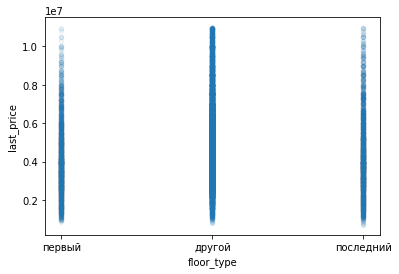

In [758]:
# Посмтроим график, чтобы вообще понимать, есть ли зависимость
df.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.06)

In [759]:
# Построим очень хитро коэффицент корреляции для подсчета зависимости между ценой за кв.м.
# Это нужно, чтобы ответить на вопрос, насколько сильно влияет фактор этажа
df['floor_type_category'] = df['floor_type'].astype('category')
df['floor_type_category'].cat.categories = [1, 0, 2]
df['floor_type_category'] = df['floor_type_category'].astype('float')
df['floor_type_category'].corr(df['last_price'])

0.027044055674814715

In [760]:
# Посмотрим на зависимость от даты размещения
df['last_price'].corr(df['created_weekday'])

-0.011969217072734501

In [761]:
# Посмотрим на зависимость от месяца размещения
df['last_price'].corr(df['created_month'])

0.0022548454248702008

In [762]:
# Посмотрим на зависимость от года размещения
df['last_price'].corr(df['created_year'])

0.02712058744537764

### Вывод по этапу 4В (зависимость цены от параметров)

- Больше всего на цену квартиры влияет цена за квадратный метр и количество комнат
- Чем дальше квартира от центра, тем меньше она стоит
- Квартиры на первом этаже котируются меньше квартир на последнем. При этом и те, и другие проигрывают в цене квартирам на других этажах. Хотя корреляция с ценой на общей выборке минимальна
- Корреляции с днем и месяцем размещения практически нет. Минимально влияет год (чем позже, тем дороже, т.е. недвижимость растет в цене). Из любопытно все же - квартиры размещенные в выходные стоят дешевле квартир размещенных в начале недели. Это можно в будущем поисследовать отдельно

### Этап 4Г. Исследование ТОП городов по стоимости жилья

- выберем 10 населённых пунктов с наибольшим числом объявлений
- посчитаем среднюю цену квадратного метра в них
- выделим населённые пункты с самой высокой и низкой стоимостью жилья

In [763]:
# выберем 10 населённых пунктов с наибольшим числом объявлений
#df['locality_name'].value_counts().head(10)
df_top_10 = df.pivot_table(index=['locality_name'], values=['floor'], aggfunc='count')
df_top_10.columns = ['count']
df_top_10 = df_top_10.sort_values(by='count', ascending=False)
df_top_10 = df_top_10.head(10)
# проверим, что получилось
df_top_10

,count
locality_name,
Санкт-Петербург,10045
посёлок Мурино,506
посёлок Шушары,403
Всеволожск,351
посёлок Парголово,308
деревня Кудрово,283
Пушкин,237
Гатчина,222
Колпино,217


In [764]:
# посчитаем среднюю цену квадратного метра в них
df_slice = (df.query('locality_name in @df_top_10.index')
              .pivot_table(index='locality_name', values=['square_meter_price'], aggfunc='mean')
              .sort_values(by='square_meter_price', ascending=False))
df_slice

,square_meter_price
locality_name,
Санкт-Петербург,103880.755817
Пушкин,100774.761646
деревня Кудрово,92873.574700
посёлок Парголово,90231.928766
посёлок Мурино,85560.519091
посёлок Шушары,78465.273375
Колпино,75131.971014
Гатчина,69200.728423
Всеволожск,67295.974786


### Вывод по этапу 4Г (сследование ТОП городов по стоимости жилья)

- Самое дорогое жилье в Санкт-Петербурге, но он вполне сопоставимо с городом Пушкин, что удивительно
- Самое дешевое в Выборге и Всеволожске, при чем разница весьма ощутима (30-40 процентов)

### Этап 4Д. Изучим предложения квартир по расстоянию от центра

- выделим квартиры в Санкт-Петербурге
- выясним, какая область входит в центр
  - для этого создадим столбец с расстоянием до центра в километрах и округлим до целых значений
  - после этого посчитаем среднюю цену для каждого километра
  - построим график и покажем, как цена зависит от удалённости от центра, определим границу, где график сильно меняется

In [765]:
# Сперва избавимся от нулевых значений, что мы не можем вычислить
# Напомню, что не делали это сразу, чтобы иметь больше остальных данных для анализа
df.dropna(subset=['nearest_city_center_distance'], inplace=True)
df.reset_index(inplace=True)

In [766]:
# Добавим расстояние до центра в километрах
df['nearest_city_center_distance_km'] = round(df['nearest_city_center_distance'] / 1000, 0)
df['nearest_city_center_distance_km'] = df['nearest_city_center_distance_km'].astype('int')

# Выберем только часть в Санкт-Петербурге
df_spb = df[df['locality_name'] == 'Санкт-Петербург']

# посмотрим, что все ок
df_spb[['nearest_city_center_distance', 'nearest_city_center_distance_km']]

,nearest_city_center_distance,nearest_city_center_distance_km
1,13933.0,14
3,11634.0,12
4,13878.0,14
8,14259.0,14
9,14616.0,15
...,...,...
11864,11602.0,12
11865,16704.0,17
11866,16081.0,16
11867,6263.0,6


In [767]:
# Посчитаем среднюю цену на каждый километр
df_spb_pivot = df_spb.pivot_table(index='nearest_city_center_distance_km', values='last_price', aggfunc='mean')
df_spb_pivot.columns = ['mean_km_price']
# посмотрим, что получилось
df_spb_pivot

,mean_km_price
nearest_city_center_distance_km,
0,6.466667e+06
1,7.784395e+06
2,7.324461e+06
3,6.775547e+06
4,6.949153e+06
5,7.079330e+06
6,6.730481e+06
7,6.343046e+06
8,6.320957e+06


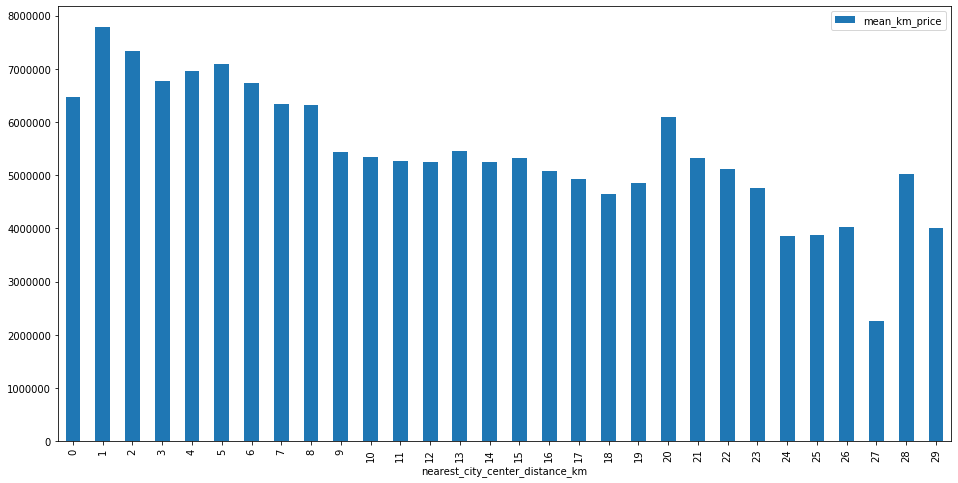

In [768]:
# Построим график
df_spb_pivot.plot(kind='bar', figsize=(16,8))

### Вывод по этапу 4Д. (предложения квартир по расстоянию от центра)

- Центром можно считать зону до 8 километров, хотя в целом, видимо в определенных отдаленных районах цена может быть сопоставима. Либо мы имеем еще выбросы.

### Этап 4Е. Дополнительно изучим сегмент квартир в центре

- Выделим сегмент квартир в центре
- Изучим площадь, цену, число комнат, высота потолков
- Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)
- Сравним с данными по целому городу

In [769]:
# выделим сегмент в центре
df_spb_center = df_spb.query('nearest_city_center_distance_km <= 8')

In [774]:
# оставим только нужные столбцы для изучения данных
need_to_describe_fields = ['total_area', 'last_price', 'rooms_count', 'ceiling_height']
df_spb[need_to_describe_fields].join(df_spb_center[need_to_describe_fields], rsuffix='_center').describe()

,total_area,last_price,rooms_count,ceiling_height,total_area_center,last_price_center,rooms_count_center,ceiling_height_center
count,10017.000000,1.001700e+04,10017.000000,10017.000000,1583.000000,1.583000e+03,1583.000000,1583.000000
mean,53.466183,5.467355e+06,1.899371,2.677848,61.876753,6.774394e+06,2.204043,2.735527
std,17.719376,1.874901e+06,0.889489,0.101044,19.678018,2.009906e+06,0.915209,0.136318
min,13.000000,1.190000e+06,0.000000,2.510000,13.200000,1.686000e+06,0.000000,2.510000
25%,40.000000,4.000000e+06,1.000000,2.650000,46.000000,5.250500e+06,2.000000,2.650000
50%,50.000000,5.000000e+06,2.000000,2.650000,60.000000,6.650000e+06,2.000000,2.650000
75%,64.500000,6.550000e+06,3.000000,2.700000,75.400000,8.338412e+06,3.000000,2.800000
max,133.600000,1.099900e+07,6.000000,3.000000,133.600000,1.099000e+07,5.000000,3.000000


#### Промежуточный вывод по Этап 4Е

- По таблице хорошо видно, что по параметрам комнат и высоты потолков, квартиры в центре почти не отличаются от выборки по всему городу. И даже максимум по числу комнат остается за общей выборкой. Однако цена и общая площадь квартир в центре выше.

Посмотрим на графики, сравним факторы, которые влияют на стоимость квартиры  (число комнат, этаж, удалённость от центра, дата размещения объявления)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ca52f4c50>,
      dtype=object)

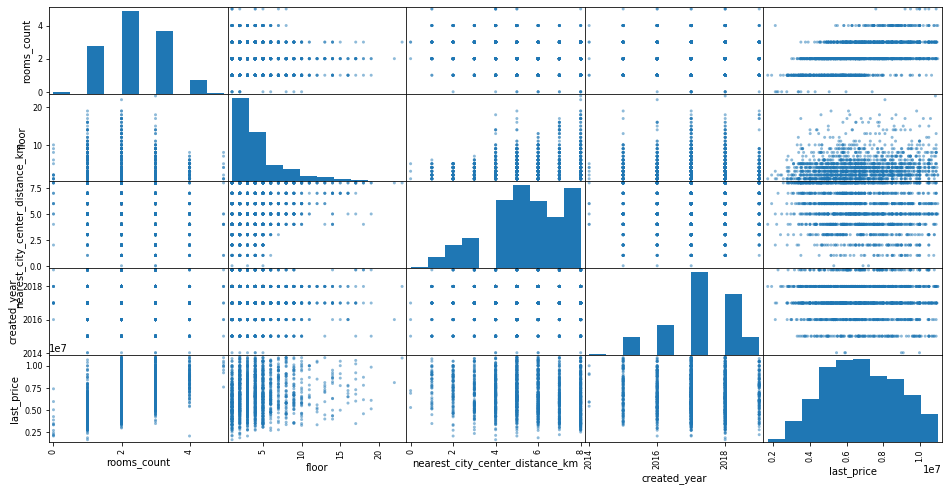

In [770]:
# оставим только нужные столбцы для построения графиков
df_spb_center_only_needed = df_spb_center[['rooms_count', 'floor', 'nearest_city_center_distance_km', 'created_year', 'last_price']]
df_spb_only_needed = df_spb[['rooms_count', 'floor', 'nearest_city_center_distance_km', 'created_year', 'last_price']]

# построим графики
pd.plotting.scatter_matrix(df_spb_center_only_needed, figsize=(16,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ca4aae410>,
      dtype=object)

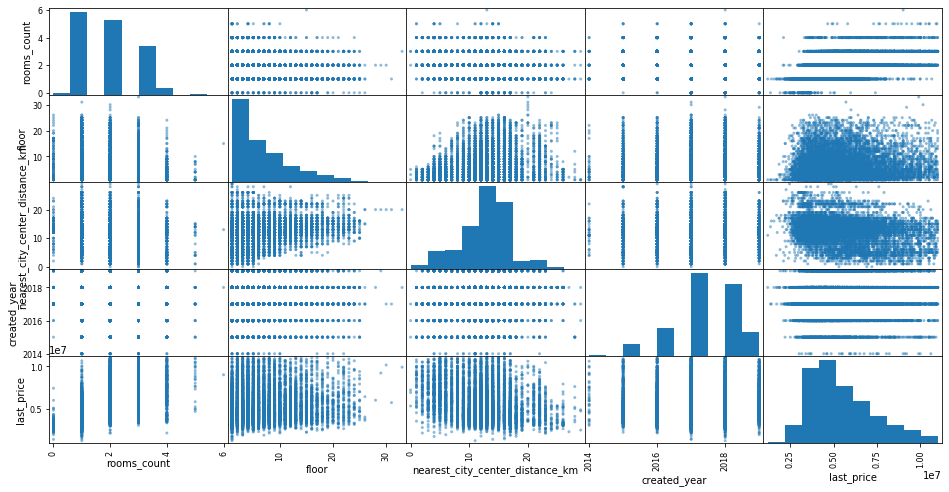

In [771]:
# Построим графики для всего города
pd.plotting.scatter_matrix(df_spb_only_needed, figsize=(16,8))

### Вывод по этапу 4Е (дополнительное изучение квартир в центре)

Помимо вывода по таблице, что мы приводили выше, графики подтверждают момент с ценой.

Кроме этого можно заметить:
- Чем ближе квартира к центру, тем на меньшем этаже она предлагается
- Квартиры в центре чаще имеют несколько комнат, чем предложения по всему городу. Однокомнатных квартир гораздо меньше
- Остальные параметры в среднем сопоставимы с квартирами в центре

### Шаг 5. Общий вывод

Мы провели отличный анализ (хочется в это верить :) )

Вспомним как звучала наша задача: `Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.`

Поэтому подводя итог, правильным будет обратить внимание на те параметры, что имеют наибольшее значение для установления цены на недвижимость. 

Согласно нашему анализу, это:
- Город, в котором находится квартира, тут разница может быть просто колоссальной
- Площадь
- Количество комнат
- Расстояние до центра
- Квартира на любом этаже кроме первого стоит дороже всего. Следом идет последний этаж. Следом первый.

При этом, может быть важно:
- Мы подтвердили, что недвижимость растет в цене
- Обнаружили несущественную связь между ценой и днем недели (чем позже, тем квартира дешевле). Возможно, это связано с тем, что в выходные как-то хочется побыстрее продать квартиру.
- Можно считать, что продажи прошли очень быстро, если заняли меньше 40 дней, а необычно долго если больше 215 дней. На будущее можно провести исследование, чем такие объявления отличаются более детально

В целом, этого должно быть достаточно, чтобы внести параметры в систему.